data: https://archive.ics.uci.edu/ml/datasets/Bank+Marketing

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [2]:
df_ori = pd.read_csv("bank-additional/bank-additional-full.csv",  sep=';')
df_ori.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,56,housemaid,married,basic.4y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
1,57,services,married,high.school,unknown,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
2,37,services,married,high.school,no,yes,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
3,40,admin.,married,basic.6y,no,no,no,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no
4,56,services,married,high.school,no,no,yes,telephone,may,mon,...,1,999,0,nonexistent,1.1,93.994,-36.4,4.857,5191.0,no


In [3]:
df=pd.read_csv('bank_additional_full_clean_normalized.csv')
df.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,...,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed,y
0,1.642226,0,2,1,0,0,0,0,5,1,...,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641,0
1,-0.196449,1,2,4,0,1,0,0,5,1,...,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641,0
2,0.093868,2,2,2,0,0,0,0,5,1,...,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641,0
3,1.642226,1,2,4,0,0,1,0,5,1,...,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641,0
4,1.932543,2,2,5,0,0,0,0,5,1,...,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641,0


In [4]:
X = df.iloc[:, 0:-1]
y = df.y

In [5]:
X.head()

,age,job,marital,education,default,housing,loan,contact,month,day_of_week,duration,campaign,pdays,previous,poutcome,emp.var.rate,cons.price.idx,cons.conf.idx,euribor3m,nr.employed
0,1.642226,0,2,1,0,0,0,0,5,1,0.005792,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641
1,-0.196449,1,2,4,0,1,0,0,5,1,-0.127941,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641
2,0.093868,2,2,2,0,0,0,0,5,1,-0.414513,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641
3,1.642226,1,2,4,0,0,1,0,5,1,0.181556,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641
4,1.932543,2,2,5,0,0,0,0,5,1,-0.460365,-0.559326,0.211884,-0.37161,1,0.727466,0.804082,0.877437,0.786089,0.401641


In [6]:
X.pdays.max(), X.pdays.min()

(0.2118836362185938, -4.749052297919588)

In [7]:
y.head(2)

0    0
1    0
Name: y, dtype: int64

In [8]:
from sklearn.model_selection import train_test_split

In [9]:
X_train, X_temp, y_train, y_temp = train_test_split(X, y, test_size=0.4, random_state=101)

In [10]:
X_cv, X_test, y_cv, y_test = train_test_split(X_temp, y_temp, test_size=0.5, random_state=101)

In [11]:
from sklearn.metrics import classification_report

In [12]:
df_ori.columns

Index(['age', 'job', 'marital', 'education', 'default', 'housing', 'loan',
       'contact', 'month', 'day_of_week', 'duration', 'campaign', 'pdays',
       'previous', 'poutcome', 'emp.var.rate', 'cons.price.idx',
       'cons.conf.idx', 'euribor3m', 'nr.employed', 'y'],
      dtype='object')

In [13]:
categorical_columns_subset = [
    'job', 'marital', 'education', 'default', 'housing', 'loan', 'contact', 'month', 'day_of_week', 'poutcome'
]

numerical_columns_subset = [
    'duration', 'campaign', 'pdays',
    'previous', 'emp.var.rate', 'cons.price.idx', 
    'cons.conf.idx', 'euribor3m', 'nr.employed'
]

X = X[categorical_columns_subset + numerical_columns_subset]
X[categorical_columns_subset] = X[categorical_columns_subset].astype("category")

n_categorical_features = X.select_dtypes(include="category").shape[1]
n_numerical_features = X.select_dtypes(include="number").shape[1]

print(f"Number of samples: {X.shape[0]}")
print(f"Number of features: {X.shape[1]}")
print(f"Number of categorical features: {n_categorical_features}")
print(f"Number of numerical features: {n_numerical_features}")

Number of samples: 30488
Number of features: 19
Number of categorical features: 10
Number of numerical features: 9


In [14]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.compose import make_column_transformer
from sklearn.compose import make_column_selector
from sklearn.pipeline import make_pipeline

one_hot_encoder = make_column_transformer(
    (
        OneHotEncoder(sparse=False, handle_unknown="ignore"),
        make_column_selector(dtype_include="category"),
    ),
    remainder="passthrough",
)



In [15]:
from sklearn.metrics import roc_curve, auc, roc_auc_score

In [16]:
from sklearn.ensemble import RandomForestClassifier

In [17]:
clf_rf1 = RandomForestClassifier(n_estimators=10, min_samples_leaf=1, class_weight='balanced').fit(X_train, y_train)

In [18]:
clf_rf2 = RandomForestClassifier(n_estimators=20, min_samples_leaf=1, class_weight='balanced').fit(X_train, y_train)

In [19]:
clf_rf3 = RandomForestClassifier(n_estimators=30, min_samples_leaf=1, class_weight='balanced').fit(X_train, y_train)

In [20]:
clf_rf4 = RandomForestClassifier(n_estimators=10, min_samples_leaf=3, class_weight='balanced').fit(X_train, y_train)

In [21]:
clf_rf5 = RandomForestClassifier(n_estimators=10, min_samples_leaf=6, class_weight='balanced').fit(X_train, y_train)

In [22]:
clf_rf6 = RandomForestClassifier(n_estimators=20, min_samples_leaf=3, class_weight='balanced').fit(X_train, y_train)

In [23]:
clf_rf7 = RandomForestClassifier(n_estimators=20, min_samples_leaf=6, class_weight='balanced').fit(X_train, y_train)

In [24]:
clf_rf8 = RandomForestClassifier(n_estimators=30, min_samples_leaf=3, class_weight='balanced').fit(X_train, y_train)

In [25]:
clf_rf9 = RandomForestClassifier(n_estimators=30, min_samples_leaf=6, class_weight='balanced').fit(X_train, y_train)

In [26]:
rf_lst = [clf_rf1, clf_rf2, clf_rf3, clf_rf4, clf_rf5, clf_rf6, clf_rf7, clf_rf8, clf_rf9]
n_est_lst = [10, 20, 30, 10, 10, 20, 20, 30, 30]
min_samp_lst = [1, 1, 1, 3, 6, 3, 6, 3, 6]

In [27]:
best_f1 = 0
best_idx = 999

for i in range(len(rf_lst)):
    print(f"Random Forest classifier {i+1}, n_estimators={n_est_lst[i]}, min_samples_leaf={min_samp_lst[i]}")
    #print("Classification report on trainng data: \n", classification_report(y_train, rf_lst[i].predict(X_train)))
    cl_rep = classification_report(y_cv, rf_lst[i].predict(X_cv), digits=4, output_dict=True)
    f1_sc = cl_rep['macro avg']['f1-score']
    
    if f1_sc > best_f1:
        best_f1 = f1_sc
        best_idx = i+1
    print('Classification report on cross-validation data:')
    print("f1-score of macro average: \n", f1_sc)
    print("----------------------------------------------------------------------------------")
    
print(f"\nThe best Random Forest classifier is classifier {best_idx} with Micro-Average F1_score {best_f1}")

Random Forest classifier 1, n_estimators=10, min_samples_leaf=1
Classification report on cross-validation data:
f1-score of macro average: 
 0.7177460813920046
----------------------------------------------------------------------------------
Random Forest classifier 2, n_estimators=20, min_samples_leaf=1
Classification report on cross-validation data:
f1-score of macro average: 
 0.7294983391483056
----------------------------------------------------------------------------------
Random Forest classifier 3, n_estimators=30, min_samples_leaf=1
Classification report on cross-validation data:
f1-score of macro average: 
 0.7357836111033043
----------------------------------------------------------------------------------
Random Forest classifier 4, n_estimators=10, min_samples_leaf=3
Classification report on cross-validation data:
f1-score of macro average: 
 0.7810132102090548
----------------------------------------------------------------------------------
Random Forest classifier 5, 

#### and clf_rf8 (n_estimators= 30 min_samples_leaf= 3 ) had the best f1-scores on class 0 and 1.  Also outperformed previously method that didn't use one-hot-encoder

In [28]:
best_auc = 0
best_idx = 999

for i in range(len(rf_lst)):
    print(f"Random Forest classifier {i+1}, n_estimators={n_est_lst[i]}, min_samples_leaf={min_samp_lst[i]}")
#     print("\nRandom Forest model",i+1, "---nn_estimators=", n_est_lst[i], ", min_samples_leaf=", min_samp_lst[i],
#           "\nroc_auc_score on trainng data\n", roc_auc_score(y_train, rf_lst[i].predict(X_train)))
    auc_sc = roc_auc_score(y_cv, rf_lst[i].predict_proba(X_cv)[:,1])
    
    if auc_sc > best_auc:
        best_auc = auc_sc
        best_idx = i+1
    
    print(f"roc_auc_score on cross-validation data: {auc_sc:.4f}\n")
    print("----------------------------------------------------------------------------------")
    
print(f"The best RF classifier is classifier {best_idx} with roc_auc_score {best_auc:.4f}")

Random Forest classifier 1, n_estimators=10, min_samples_leaf=1
roc_auc_score on cross-validation data: 0.9166

----------------------------------------------------------------------------------
Random Forest classifier 2, n_estimators=20, min_samples_leaf=1
roc_auc_score on cross-validation data: 0.9289

----------------------------------------------------------------------------------
Random Forest classifier 3, n_estimators=30, min_samples_leaf=1
roc_auc_score on cross-validation data: 0.9335

----------------------------------------------------------------------------------
Random Forest classifier 4, n_estimators=10, min_samples_leaf=3
roc_auc_score on cross-validation data: 0.9355

----------------------------------------------------------------------------------
Random Forest classifier 5, n_estimators=10, min_samples_leaf=6
roc_auc_score on cross-validation data: 0.9400

----------------------------------------------------------------------------------
Random Forest classifier 

### clf_rf8 had the best roc_auc_score. 

In [29]:
import joblib
joblib.dump(clf_rf8, "best_random_forest_model_n_estimators30_min_samples_leaf3_wt_balnced.sav")

['best_random_forest_model_n_estimators30_min_samples_leaf3_wt_balnced.sav']

In [30]:
clf_load = joblib.load("best_random_forest_model_n_estimators30_min_samples_leaf3_wt_balnced.sav")

## Feature importance with permutation importance.
* Permutation importance measures feature importance by how much accuracy of the prediction is affected after the data of each feature (column) are shuffled.

In [31]:
import eli5
from eli5.sklearn import PermutationImportance

perm = PermutationImportance(clf_rf8, random_state=101).fit(X_test, y_test)

/home/jun/.local/lib/python3.8/site-packages/xgboost/compat.py:31: FutureWarning: pandas.Int64Index is deprecated and will be removed from pandas in a future version. Use pandas.Index with the appropriate dtype instead.
  from pandas import MultiIndex, Int64Index
2022-05-12 03:10:42.673751: I tensorflow/stream_executor/platform/default/dso_loader.cc:53] Successfully opened dynamic library libcudart.so.11.0


In [32]:
eli5.show_weights(perm, feature_names = X_test.columns.tolist())

Weight,Feature
0.0792 ± 0.0058,duration
0.0031 ± 0.0015,cons.price.idx
0.0030 ± 0.0021,emp.var.rate
0.0027 ± 0.0025,nr.employed
0.0017 ± 0.0030,education
0.0012 ± 0.0030,day_of_week
0.0012 ± 0.0039,euribor3m
0.0012 ± 0.0039,age
0.0011 ± 0.0007,loan
0.0008 ± 0.0017,job


### Partial Dependence Plots (PDP)
* Partial dependence plots display how a feature (or features) affects predictions.

In [33]:
feature_names = list(X_test.columns)

In [34]:
feature_names

['age',
 'job',
 'marital',
 'education',
 'default',
 'housing',
 'loan',
 'contact',
 'month',
 'day_of_week',
 'duration',
 'campaign',
 'pdays',
 'previous',
 'poutcome',
 'emp.var.rate',
 'cons.price.idx',
 'cons.conf.idx',
 'euribor3m',
 'nr.employed']

findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.
findfont: Font family ['Arial'] not found. Falling back to DejaVu Sans.


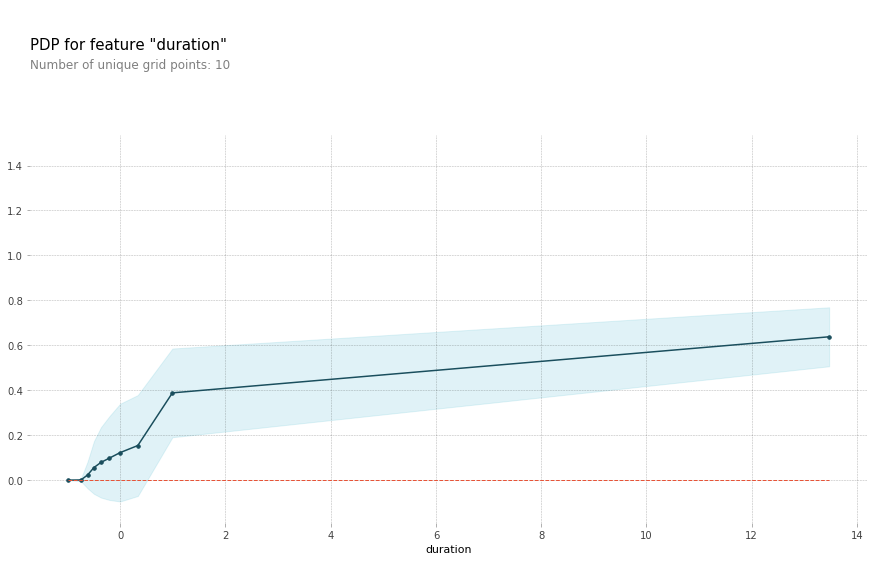

In [35]:
from matplotlib import pyplot as plt
from pdpbox import pdp, get_dataset, info_plots

duration = pdp.pdp_isolate(model=clf_rf6, dataset=X_test, model_features=feature_names, feature='duration')

# plot it
pdp.pdp_plot(duration, 'duration')
plt.savefig("PDP_duration.png", dpi=300)
plt.show()

#### Duration (last contact duration) is the most important feature based on the permutation importance.  The PDP shows the feature positively affect bank deposit subscritions.  The scale is normalized data, not original data (in seconds).  

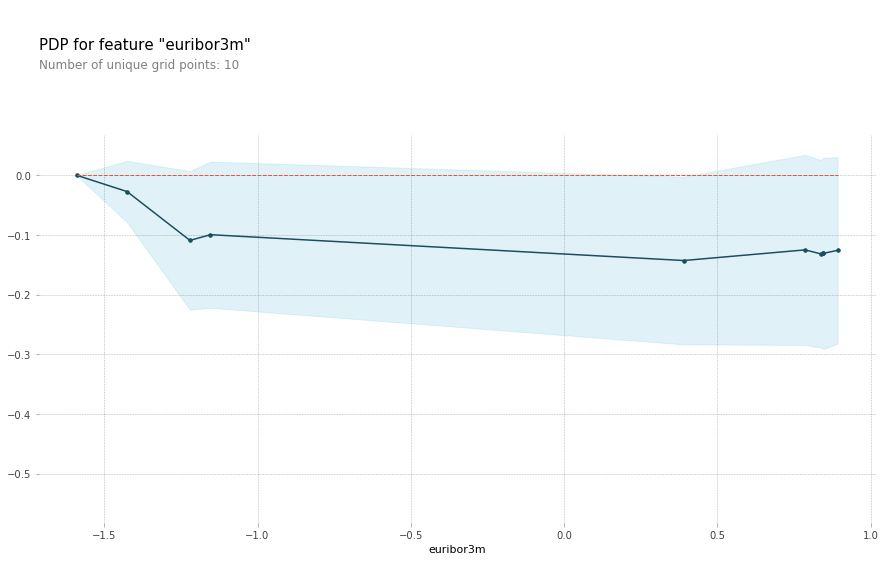

In [36]:
# Create the data that we will plot
feat_name = 'euribor3m'
euribor3m = pdp.pdp_isolate(model=clf_rf6, dataset=X_test, model_features=feature_names, feature=feat_name)

# plot it
pdp.pdp_plot(euribor3m, feat_name)
plt.savefig("PDP_Euribor3m.png", dpi=300)
plt.show()

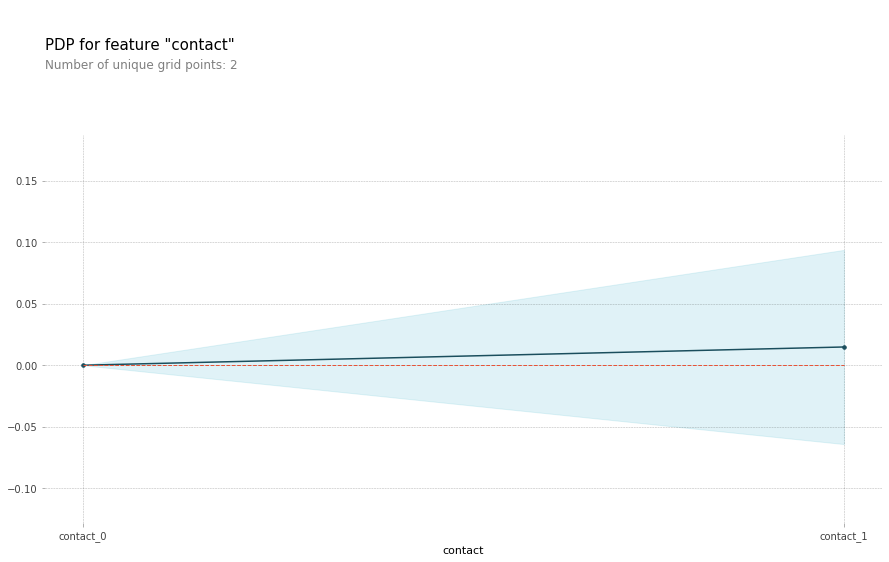

In [37]:
# Create the data that we will plot
feat_name = 'contact'
pltt = pdp.pdp_isolate(model=clf_rf6, dataset=X_test, model_features=feature_names, feature=feat_name)

# plot it
pdp.pdp_plot(pltt, feat_name)
plt.savefig("PDP_contact.png", dpi=300)
plt.show()

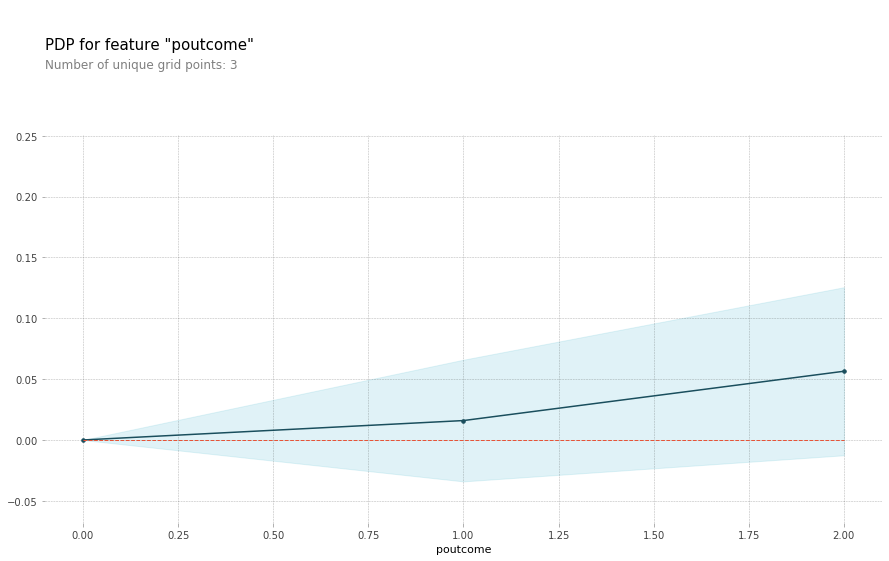

In [38]:
# Create the data that we will plot
feat_name = 'poutcome'
euribor3m = pdp.pdp_isolate(model=clf_rf6, dataset=X_test, model_features=feature_names, feature=feat_name)

# plot it
pdp.pdp_plot(euribor3m, feat_name)
plt.savefig("PDP_poutcome.png", dpi=300)
plt.show()

#### Euribor3m (3 months Euribor rate) is the second most import feature detected in the permutation importance study. The PDP shows the feature negatively affects bank deposit subscritions initially, then partially bounce back. The scale is normalized data, not original data. 

### 2D Partial Dependence Plots

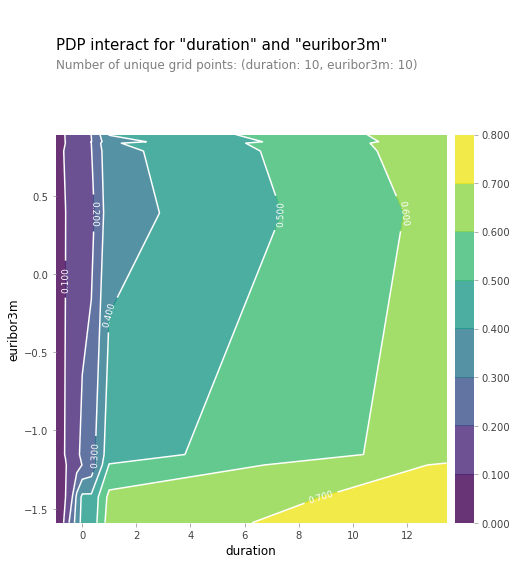

In [39]:
plot_features = ['duration', 'euribor3m']
inter1  =  pdp.pdp_interact(model=clf_rf6, dataset=X_test, model_features=feature_names, features=plot_features)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=plot_features, plot_type='contour')
plt.savefig("PDP2D_Duration_Euribor3m.png", dpi=300)
plt.show()

#### 2D Partial Dependence Plots the highest subscrition rates were achieved with Euribor3m low and duaration high.


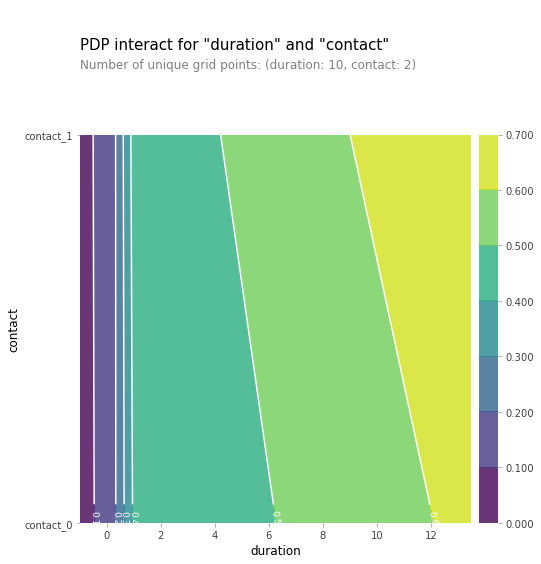

In [40]:
plot_features = ['duration', 'contact']
inter1  =  pdp.pdp_interact(model=clf_rf6, dataset=X_test, model_features=feature_names, features=plot_features)

pdp.pdp_interact_plot(pdp_interact_out=inter1, feature_names=plot_features, plot_type='contour')
plt.savefig("PDP2D_Duration_contact.png", dpi=300)
plt.show()

#### Both duration and contact_1 (cellular phones) affect subscription rate.

In [44]:
X_test.iloc[2]

age               -0.389994
job                6.000000
marital            2.000000
education          6.000000
default            0.000000
housing            0.000000
loan               0.000000
contact            0.000000
month             11.000000
day_of_week        1.000000
duration           2.775989
campaign          -0.559326
pdays             -4.714291
previous           5.366854
poutcome           0.000000
emp.var.rate      -2.066872
cons.price.idx    -1.493594
cons.conf.idx      2.192883
euribor3m         -1.545065
nr.employed       -1.906827
Name: 28457, dtype: float64

## Shap values

In [46]:


explainer = shap.TreeExplainer(clf_rf8)

row_num = 2 # use 1 row of data here. Could use multiple rows if desired
row_for_prediction = X_test.iloc[row_num].values.reshape(1, -1)

print(clf_rf8.predict_proba(row_for_prediction))

shap_values = explainer.shap_values(row_for_prediction)


[[0.21212216 0.78787784]]


In [87]:
# plot 11th row of X_test
shap.initjs()
row_data = X_test.iloc[10]
shap_values = explainer.shap_values(row_data)
shap.plots.force(explainer.expected_value[1], shap_values[1], row_data)
#plt.savefig('shap_values_row10.png')

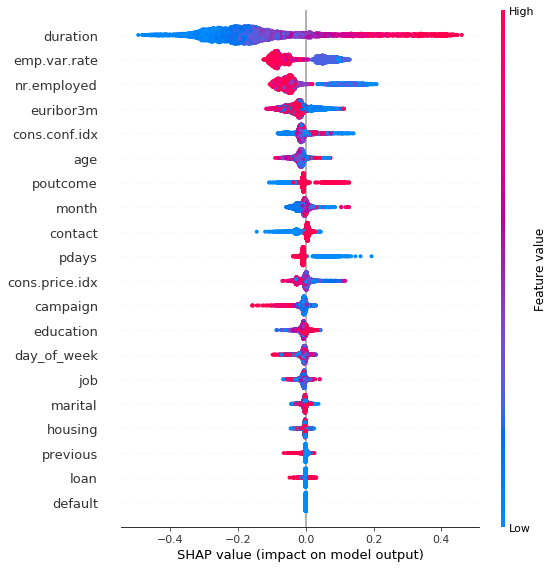

In [88]:
# Use all rows of Test data
import shap  

explainer = shap.TreeExplainer(clf_rf8)

shap_values = explainer.shap_values(X_test)

# Make plot. Index of [1] is explained in text below.
shap.summary_plot(shap_values[1], X_test)